In [2]:
import pandas as pd 

data_emp = pd.read_csv("최종_서울시_빈집_현황.csv")
data_air =pd.read_csv("최종_대기환경정보.csv")
data_s = pd.read_csv('최종_소음진동민원_전처리.csv')
data_p = pd.read_csv('최종_환경오염물질_배출시설.csv')

In [20]:
data_emp

,year,gu,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택
0,2020,종로구,2194,330,566,310,896,92
1,2020,중구,1850,53,1157,99,458,83
2,2020,용산구,4513,217,2569,445,1197,85
3,2020,성동구,2538,473,1170,63,783,49
4,2020,광진구,735,0,360,57,292,22
...,...,...,...,...,...,...,...,...
70,2022,관악구,1547,306,712,73,437,19
71,2022,서초구,6921,202,3518,454,2662,85
72,2022,강남구,11872,11,5980,583,5193,105
73,2022,송파구,6267,55,3110,231,2796,75


In [5]:
new_emp = data_emp.groupby('gu').agg(sum)

C:\Users\8304\AppData\Local\Temp\ipykernel_3908\3817181771.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  new_emp = data_emp.groupby('gu').agg(sum)


In [6]:
new_emp.head()

,year,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택
gu,,,,,,,
강남구,6063,35440,29,17630,1892,15571,318
강동구,6063,15266,30,9985,387,4737,127
강북구,6063,7281,423,2691,486,3576,105
강서구,6063,24010,138,12422,859,10345,246
관악구,6063,3086,527,1405,188,925,41


In [27]:
new_emp.describe()

,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택
count,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,11773.40000,411.840000,6218.280000,666.280000,4301.440000,175.400000
std,7880.28879,456.298758,4681.829036,447.156434,3569.523487,87.101473
min,2966.00000,16.000000,807.000000,163.000000,925.000000,41.000000
25%,6017.00000,136.000000,3013.000000,330.000000,1476.000000,118.000000
50%,10501.00000,353.000000,4518.000000,486.000000,3576.000000,166.000000
75%,15266.00000,527.000000,9332.000000,914.000000,5731.000000,230.000000
max,35440.00000,2095.000000,17630.000000,1892.000000,15571.000000,373.000000


In [26]:
new_emp.to_csv('전체_서울시_빈집_현황.csv')

In [28]:
data_air.head()

,year,gu,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,2020,강남구,0.037,0.003,0.7,0.003,31.0,23.0
1,2020,강동구,0.036,0.004,0.6,0.003,37.0,28.0
2,2020,강북구,0.045,0.004,0.7,0.003,41.0,27.0
3,2020,강서구,0.041,0.004,0.6,0.005,39.0,23.0
4,2020,관악구,0.043,0.008,0.7,0.003,35.0,22.0


In [3]:
new_air = data_air.groupby('gu').agg(sum)

C:\Users\8304\AppData\Local\Temp\ipykernel_3908\1296989905.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  new_air = data_air.groupby('gu').agg(sum)


In [4]:
new_air.head()

,year,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
gu,,,,,,,
강남구,2215015,26.339032,30.446235,489.947032,3.481353,36775.554338,21418.713107
강동구,2215015,24.208795,26.299982,453.800000,2.899938,39983.000000,22825.652651
강북구,2215015,18.493000,30.945000,457.817717,2.784000,40879.298630,21445.000000
강서구,2215015,25.751325,30.957246,503.659543,3.997117,41700.095064,21920.000000
관악구,2215015,28.598374,29.168912,544.493601,3.365070,38139.799087,20295.517808


#### 구별 빈집 분석

In [16]:
del new_air['year']

In [34]:
new_emp.head()

,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택
gu,,,,,,
강남구,35440,29,17630,1892,15571,318
강동구,15266,30,9985,387,4737,127
강북구,7281,423,2691,486,3576,105
강서구,24010,138,12422,859,10345,246
관악구,3086,527,1405,188,925,41


In [11]:
del new_emp['year']

In [12]:
new_emp.sort_values('소계',ascending=False)

,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택
gu,,,,,,
강남구,35440,29,17630,1892,15571,318
강서구,24010,138,12422,859,10345,246
서초구,23366,353,14187,1292,7304,230
송파구,19147,80,9768,599,8518,182
노원구,18129,1234,15211,191,1413,80
구로구,16773,173,9332,1447,5659,162
강동구,15266,30,9985,387,4737,127
마포구,14325,227,6002,622,7101,373
양천구,13432,54,6855,638,5731,154


#### 서울시 빈집 정보와 서울 대기오염 데이터의 상관관계분석

In [17]:
emp_air = pd.merge(new_emp, new_air, on='gu', how='inner')
emp_air.head()

,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
gu,,,,,,,,,,,,
강남구,35440,29,17630,1892,15571,318,26.339032,30.446235,489.947032,3.481353,36775.554338,21418.713107
강동구,15266,30,9985,387,4737,127,24.208795,26.299982,453.800000,2.899938,39983.000000,22825.652651
강북구,7281,423,2691,486,3576,105,18.493000,30.945000,457.817717,2.784000,40879.298630,21445.000000
강서구,24010,138,12422,859,10345,246,25.751325,30.957246,503.659543,3.997117,41700.095064,21920.000000
관악구,3086,527,1405,188,925,41,28.598374,29.168912,544.493601,3.365070,38139.799087,20295.517808


In [18]:
corr_m = emp_air.corr()
corr_m

,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
소계,1.000000,-0.148471,0.939789,0.694711,0.895547,0.470382,0.111606,0.127187,-0.219833,0.217852,0.065697,0.030586
단독주택,-0.148471,1.000000,-0.084474,-0.077029,-0.333685,-0.058721,0.117244,0.027386,0.371927,-0.132904,0.085743,-0.191761
아파트,0.939789,-0.084474,1.000000,0.528086,0.699773,0.329598,0.150291,0.048990,-0.257528,0.140884,0.104369,0.112660
연립주택,0.694711,-0.077029,0.528086,1.000000,0.712260,0.548783,-0.066115,0.257911,-0.134814,0.317840,0.017129,-0.213888
다세대주택,0.895547,-0.333685,0.699773,0.712260,1.000000,0.520544,0.036242,0.179940,-0.178271,0.264996,-0.001787,-0.028384
비거주용_건물내_주택,0.470382,-0.058721,0.329598,0.548783,0.520544,1.000000,0.260923,0.033412,0.000714,0.342247,-0.128727,-0.021661
이산화질소농도(ppm),0.111606,0.117244,0.150291,-0.066115,0.036242,0.260923,1.000000,-0.474384,0.098475,0.168921,0.194608,0.180177
오존농도(ppm),0.127187,0.027386,0.048990,0.257911,0.179940,0.033412,-0.474384,1.000000,-0.181520,0.157768,-0.125358,-0.315220
일산화탄소농도(ppm),-0.219833,0.371927,-0.257528,-0.134814,-0.178271,0.000714,0.098475,-0.181520,1.000000,0.412338,-0.364582,-0.107652
아황산가스농도(ppm),0.217852,-0.132904,0.140884,0.317840,0.264996,0.342247,0.168921,0.157768,0.412338,1.000000,-0.057596,0.108556


c:\Users\8304\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\8304\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


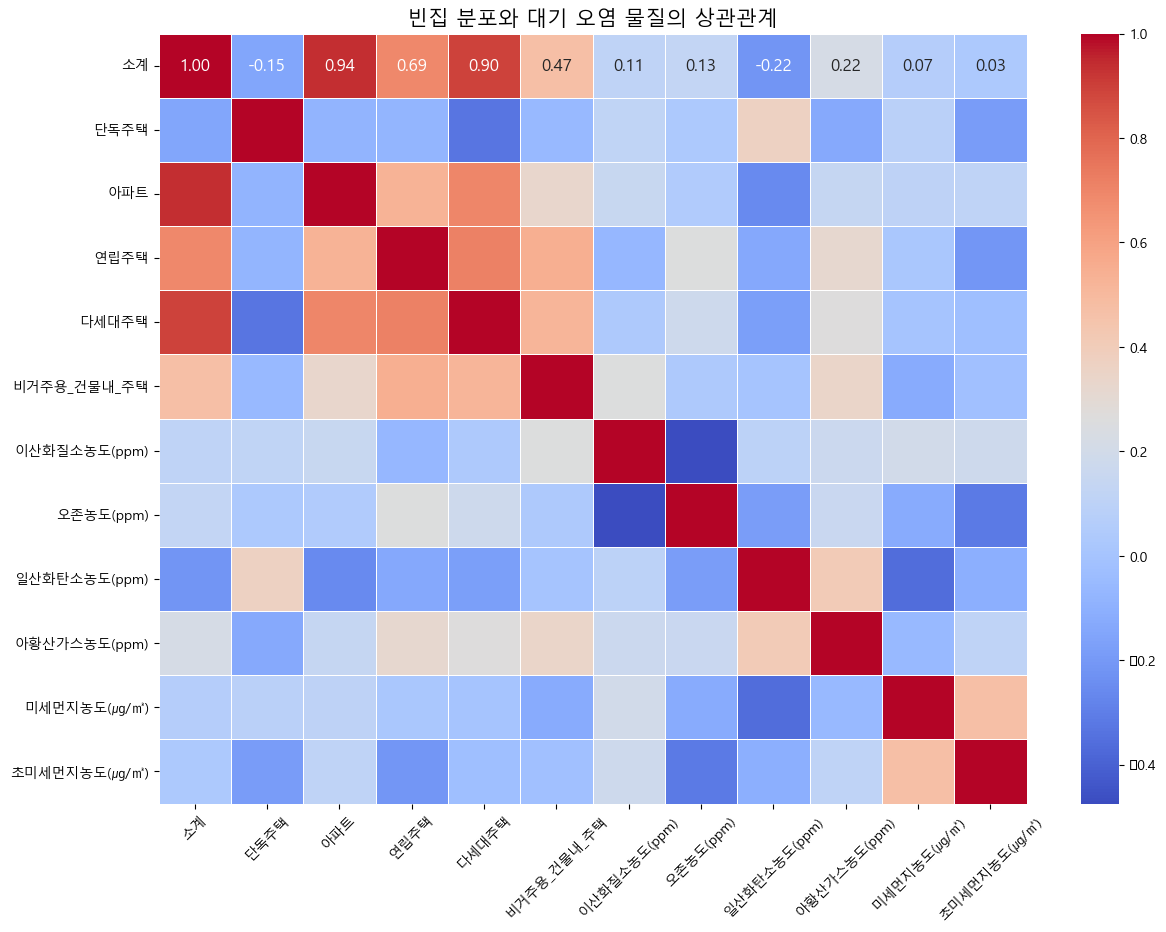

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 상관관계 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(corr_m, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 12})
plt.title('빈집 분포와 대기 오염 물질의 상관관계', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [27]:
# 빈집 관련 컬럼들
housing_columns = new_emp.columns

# 대기오염 관련 컬럼들
pollution_columns = new_air.columns
# 빈집과 대기오염 변수 간의 상관관계만 추출
correlation_housing_pollution = corr_m.loc[housing_columns, pollution_columns]

# 절대값 기준으로 상위 5개 상관관계 추출
top_5_correlations = correlation_housing_pollution.unstack().abs().sort_values(ascending=False).head(10)

# 상위 5개 상관관계 출력
top_5_correlations

일산화탄소농도(ppm)  단독주택           0.371927
아황산가스농도(ppm)  비거주용_건물내_주택    0.342247
              연립주택           0.317840
              다세대주택          0.264996
이산화질소농도(ppm)  비거주용_건물내_주택    0.260923
오존농도(ppm)     연립주택           0.257911
일산화탄소농도(ppm)  아파트            0.257528
              소계             0.219833
아황산가스농도(ppm)  소계             0.217852
초미세먼지농도(㎍/㎥)  연립주택           0.213888
dtype: float64

#### 데이터분포 확인

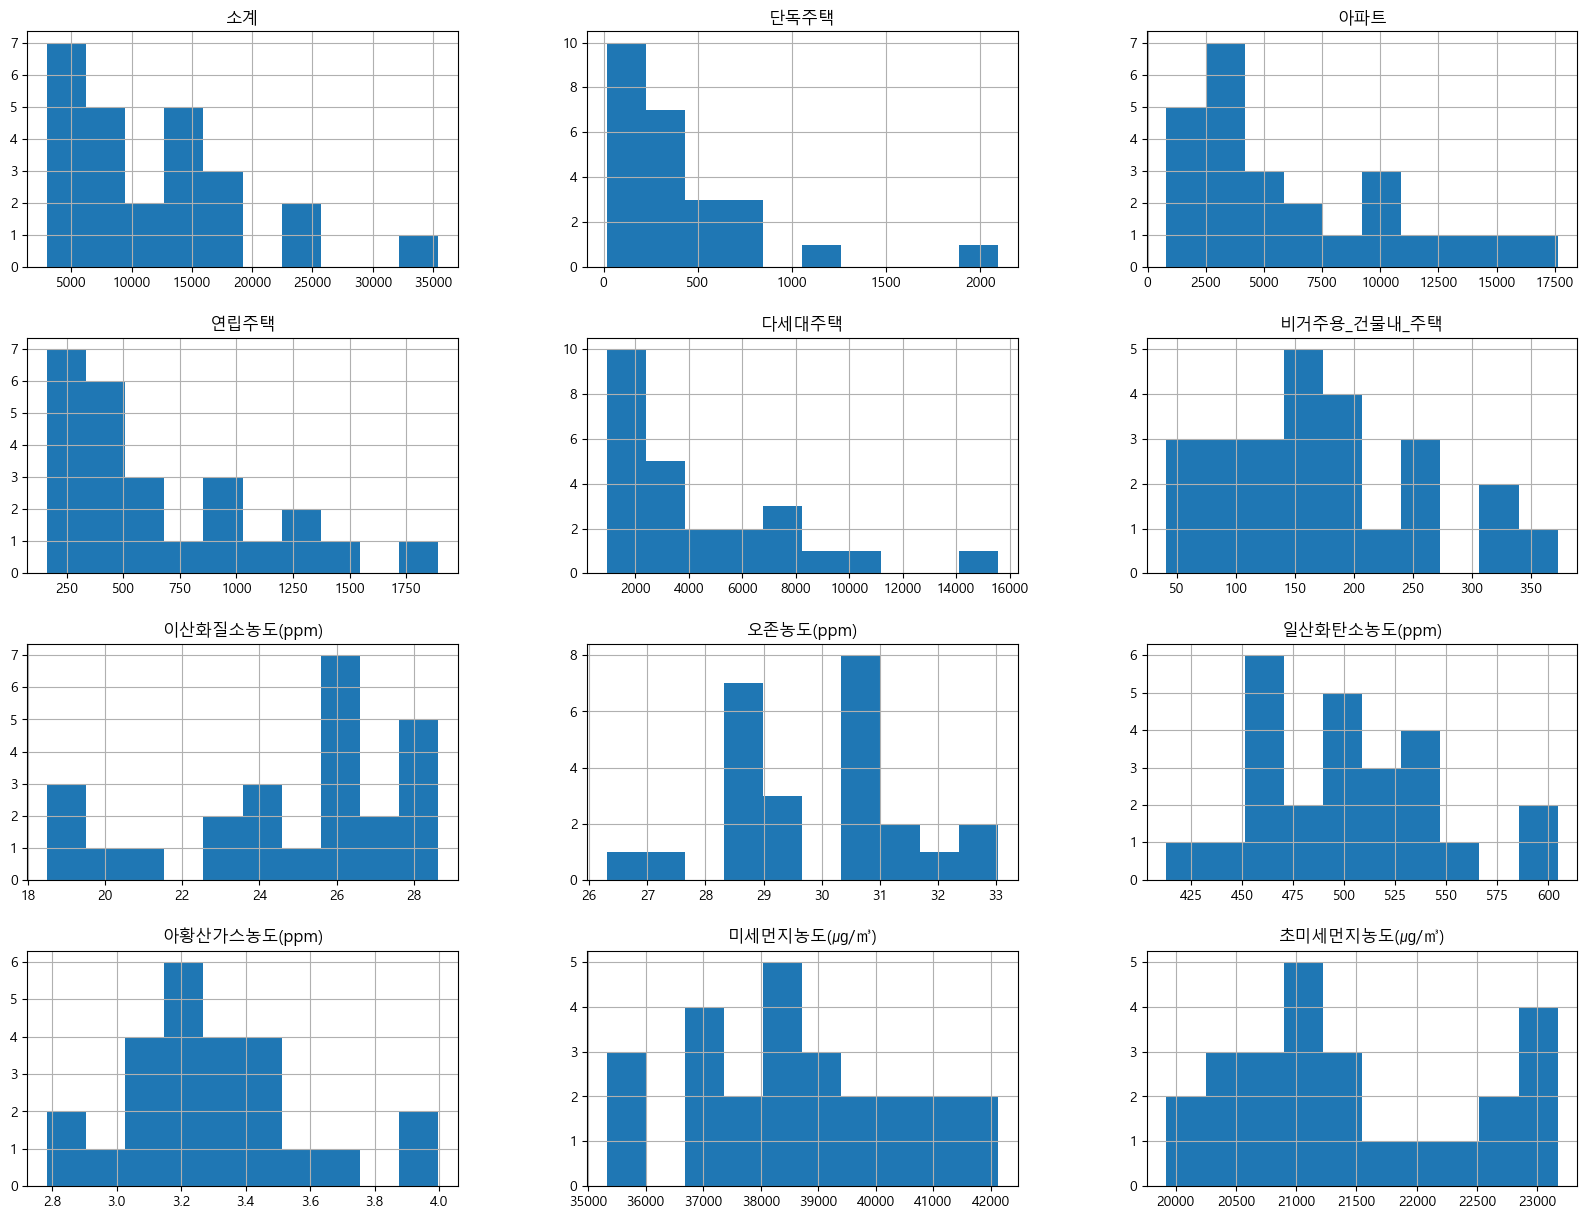

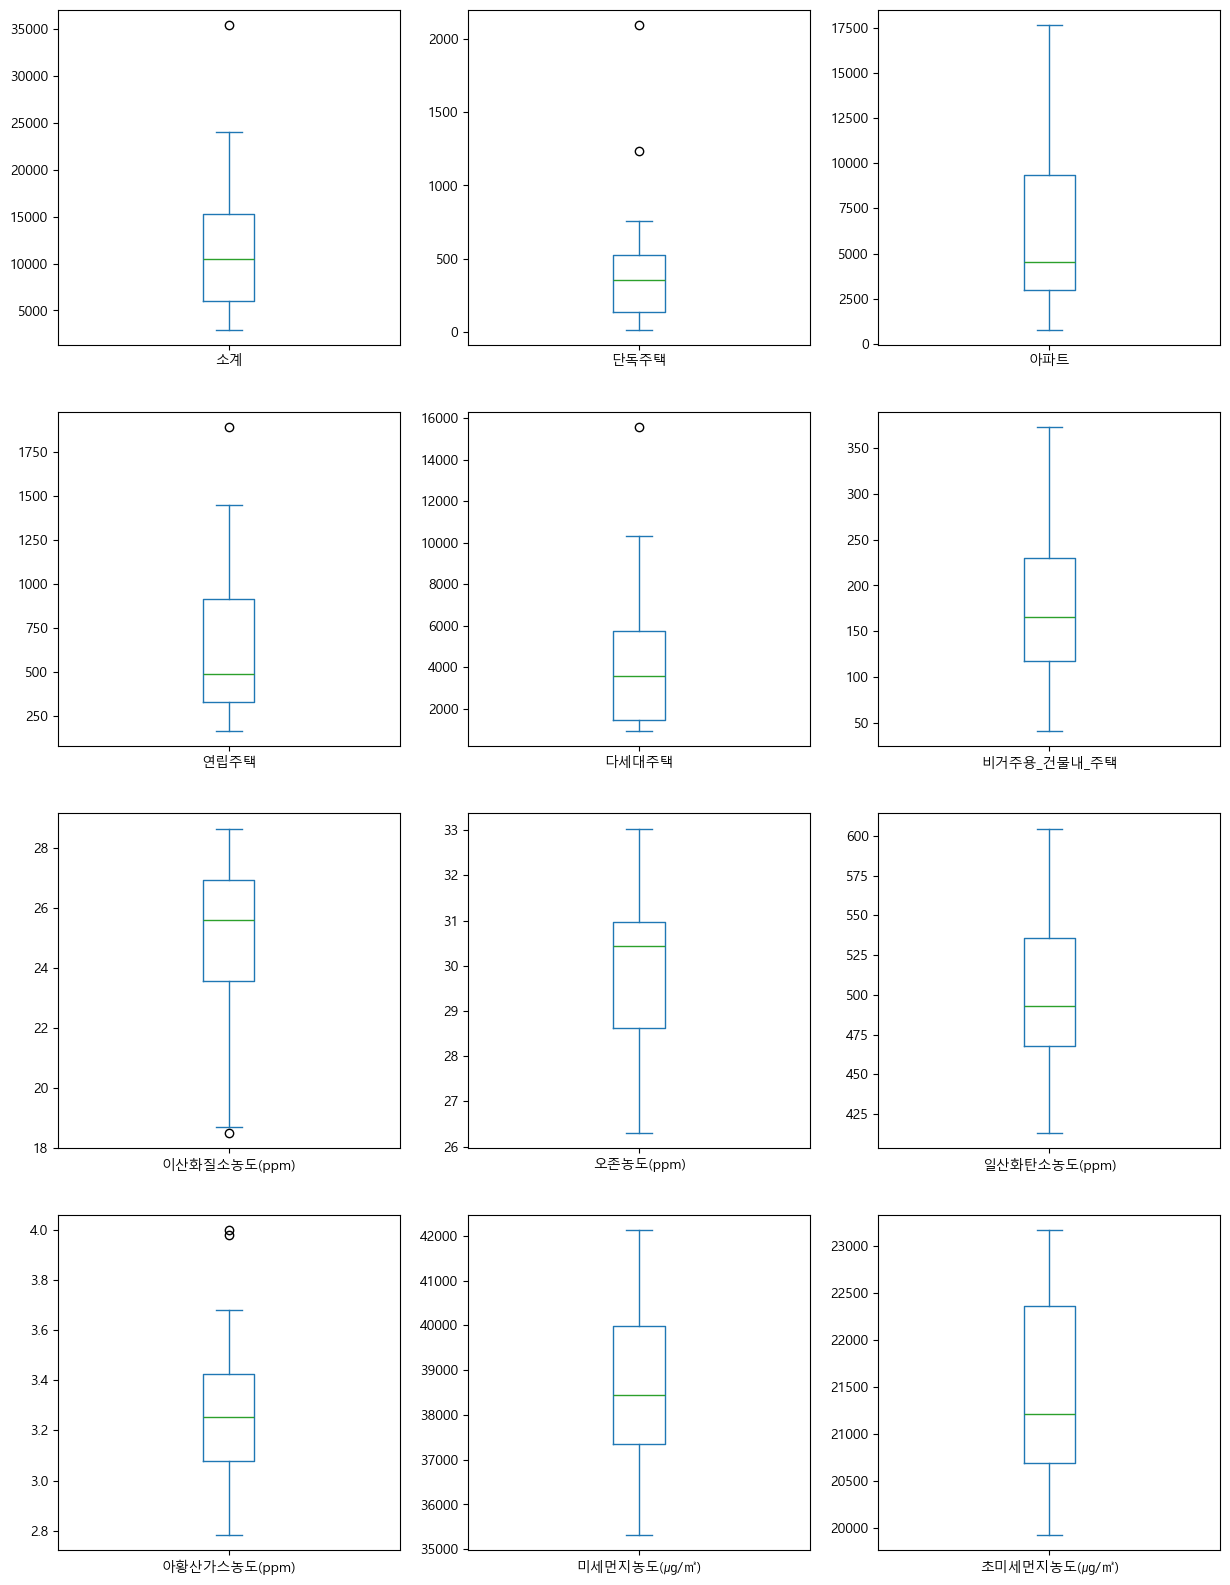

In [30]:
# 히스토그램 및 KDE
emp_air.hist(figsize=(20, 15))
plt.show()

# 박스 플롯
emp_air.plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 20))
plt.show()

c:\Users\8304\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\8304\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\8304\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\8304\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

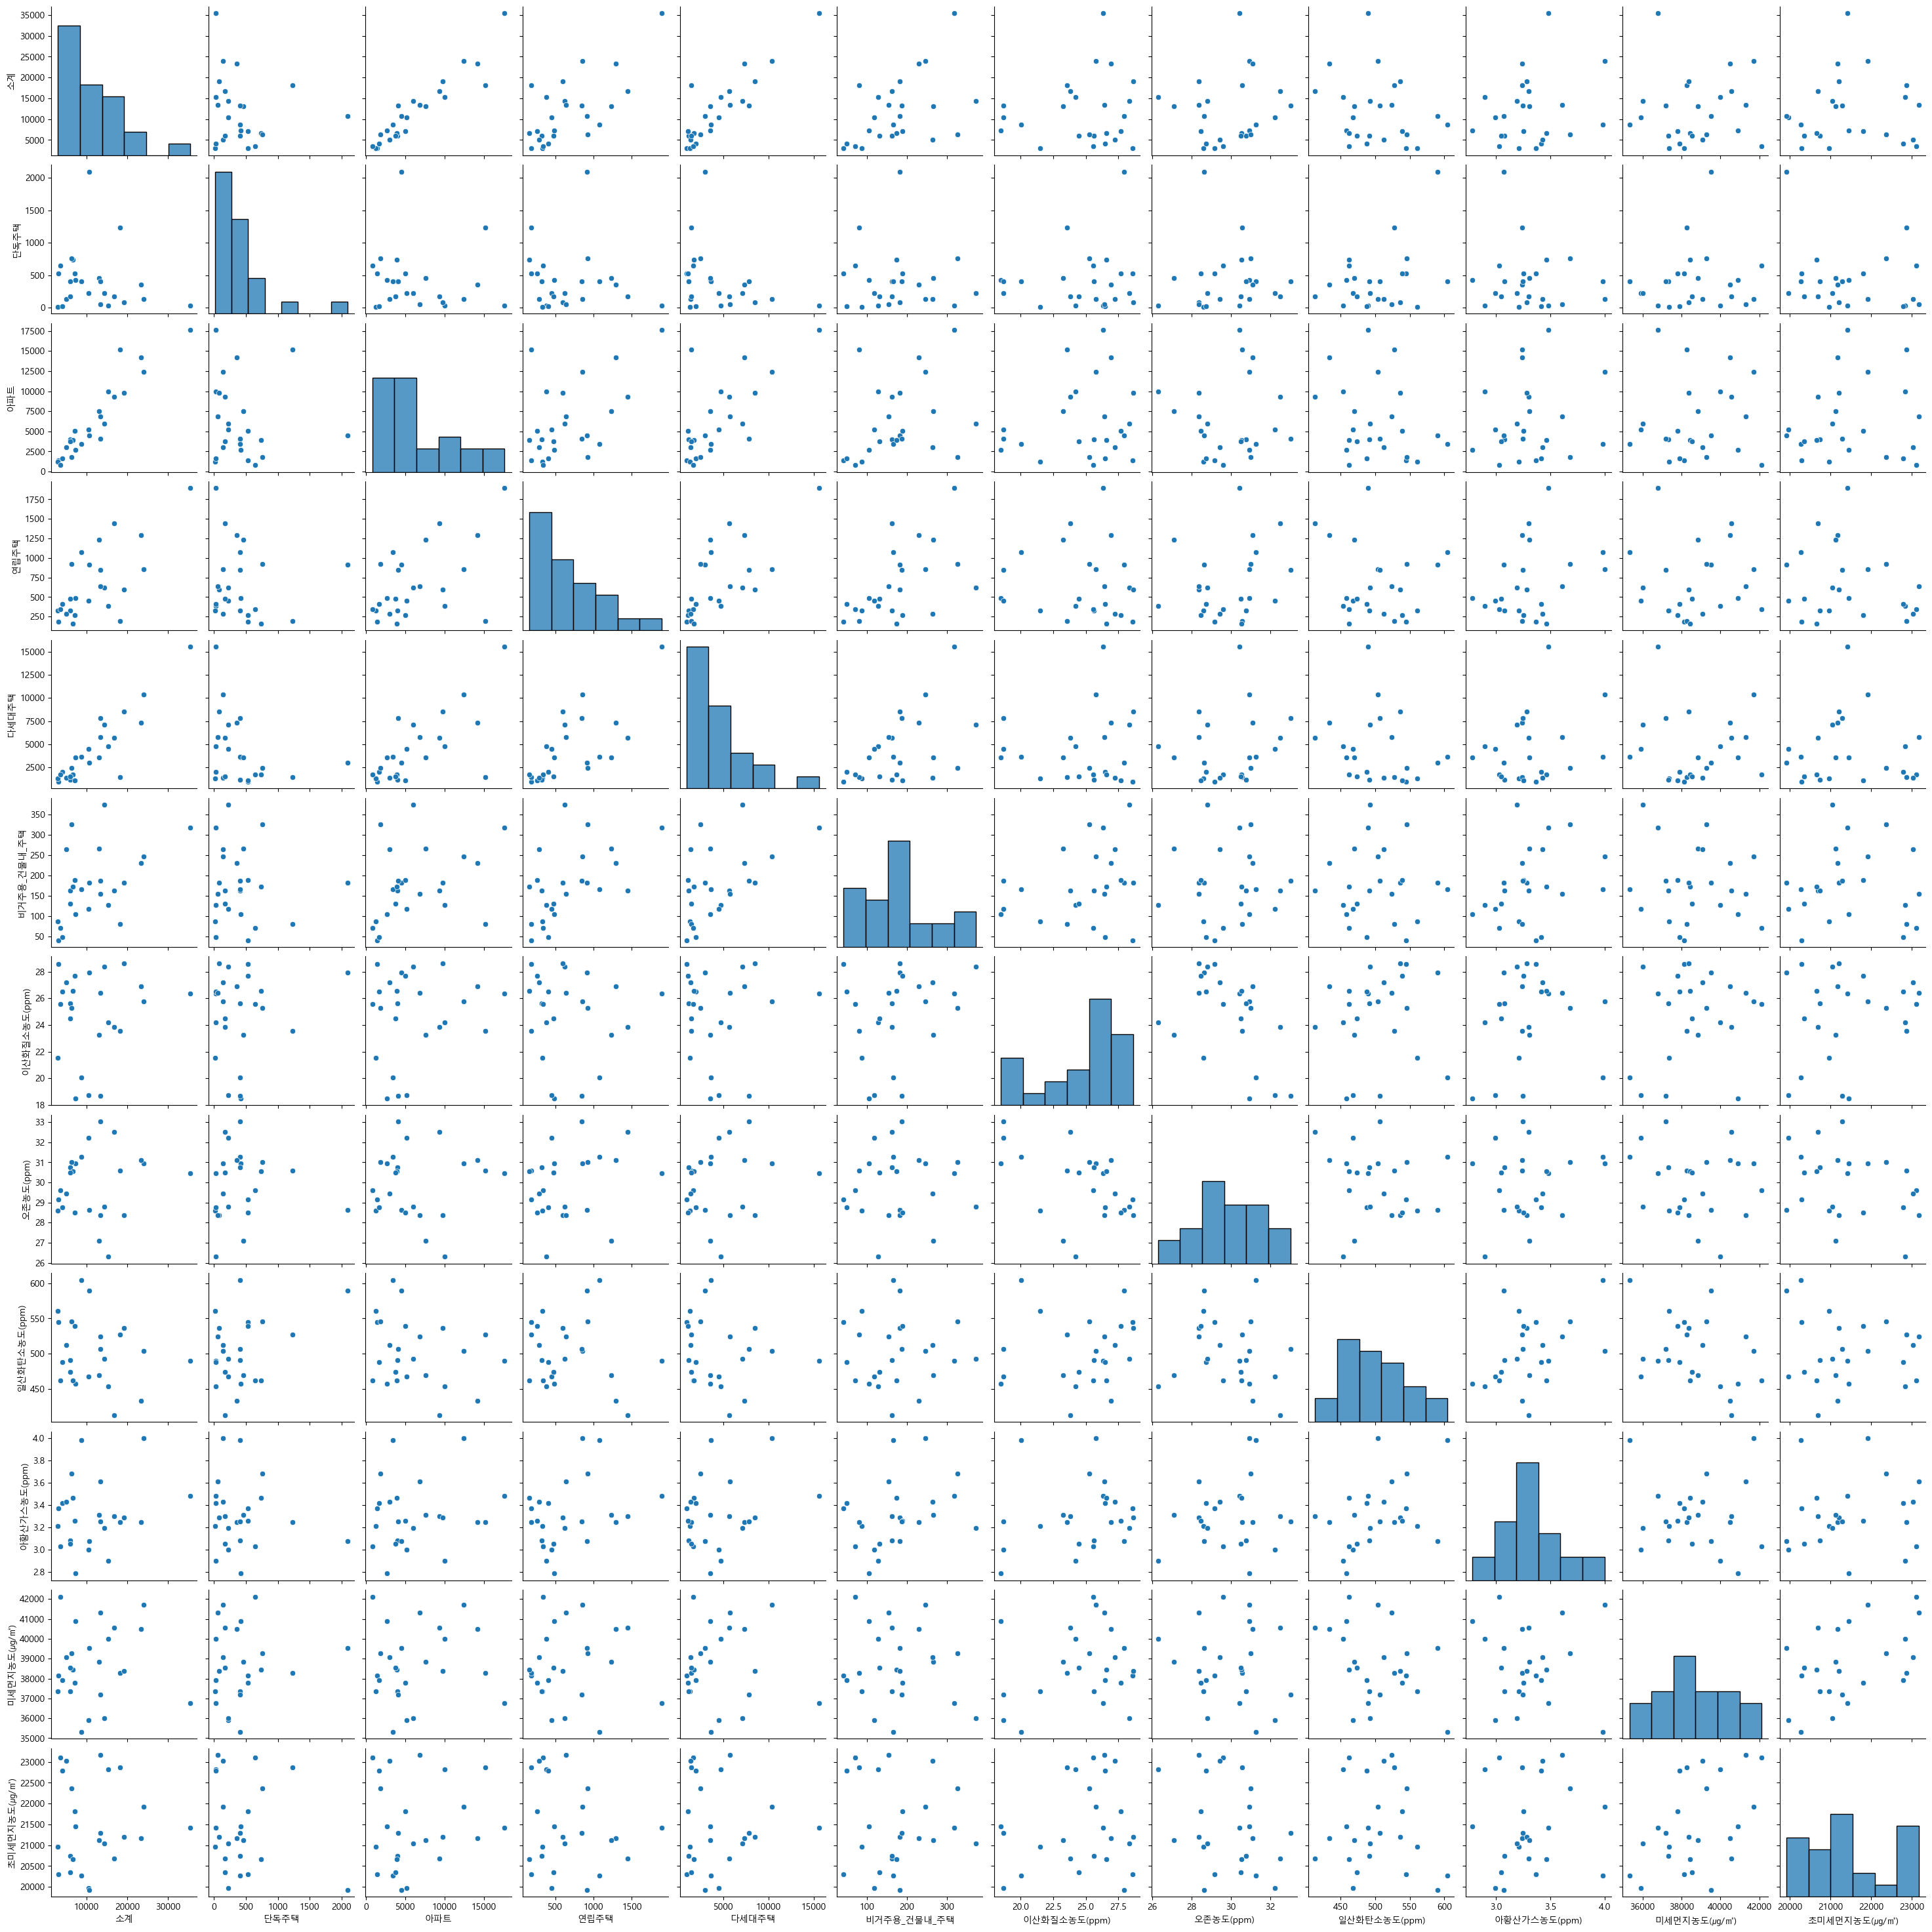

In [31]:
# 변수 관계 시각화 - 산점도
sns.pairplot(emp_air)
plt.show()

In [39]:
emp_air.to_csv('서울시_빈집_대기오염데이터(구별).csv', index=False)

In [3]:
import pandas as pd

In [5]:
new_emp = pd.read_csv('../data/raw/최종_서울시_빈집_현황.csv')
new_emp

,year,gu,소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택
0,2020,종로구,2194,330,566,310,896,92
1,2020,중구,1850,53,1157,99,458,83
2,2020,용산구,4513,217,2569,445,1197,85
3,2020,성동구,2538,473,1170,63,783,49
4,2020,광진구,735,0,360,57,292,22
...,...,...,...,...,...,...,...,...
70,2022,관악구,1547,306,712,73,437,19
71,2022,서초구,6921,202,3518,454,2662,85
72,2022,강남구,11872,11,5980,583,5193,105
73,2022,송파구,6267,55,3110,231,2796,75


In [6]:
new_emp.rename(columns={'소계':'빈집_소계'},inplace=True)

In [8]:
new_air = pd.read_csv('../data/raw/최종_대기환경정보.csv')
new_air.head()

,year,gu,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,2020,강남구,0.037,0.003,0.7,0.003,31.0,23.0
1,2020,강동구,0.036,0.004,0.6,0.003,37.0,28.0
2,2020,강북구,0.045,0.004,0.7,0.003,41.0,27.0
3,2020,강서구,0.041,0.004,0.6,0.005,39.0,23.0
4,2020,관악구,0.043,0.008,0.7,0.003,35.0,22.0


In [16]:
new_air.shape

(27400, 8)

In [26]:
new_noise = pd.read_csv('../data/raw/최종_소음진동민원_전처리.csv')
new_noise

,Year,Gu,NoiseType,Count
0,2020,종로구,소계,2016
1,2020,중구,소계,1060
2,2020,용산구,소계,1625
3,2020,성동구,소계,1860
4,2020,광진구,소계,1943
...,...,...,...,...
295,2022,관악구,생활,3525
296,2022,서초구,생활,5252
297,2022,강남구,생활,9883
298,2022,송파구,생활,3282


In [27]:

# Pivot the data
new_noise = new_noise.pivot_table(index=['Year', 'Gu'], columns='NoiseType', values='Count', aggfunc='sum').reset_index()

# Rename the columns for clarity
new_noise.columns = ['year', 'gu', '소음_공장', '소음_교통', '소음_생활', '소음_소계']

# Display the transformed data
new_noise.head()

,year,gu,소음_공장,소음_교통,소음_생활,소음_소계
0,2020,강남구,0,0,7518,7518
1,2020,강동구,0,4,4323,4327
2,2020,강북구,0,14,2190,2204
3,2020,강서구,0,16,1332,1348
4,2020,관악구,0,4,2538,2542


In [11]:
new_pollute = pd.read_csv('../data/raw/최종_환경오염물질_배출시설.csv')
new_pollute

,Year,Gu,Noise_Type,Count
0,2020,종로구,대기(가스·먼지·매연및악취) 소계,111
1,2020,중구,대기(가스·먼지·매연및악취) 소계,197
2,2020,용산구,대기(가스·먼지·매연및악취) 소계,41
3,2020,성동구,대기(가스·먼지·매연및악취) 소계,215
4,2020,광진구,대기(가스·먼지·매연및악취) 소계,35
...,...,...,...,...
895,2022,관악구,수질(폐수) 5종,44
896,2022,서초구,수질(폐수) 5종,146
897,2022,강남구,수질(폐수) 5종,166
898,2022,송파구,수질(폐수) 5종,153


In [22]:

new_pollute= new_pollute.pivot_table(index=['Year', 'Gu'], columns='Noise_Type', values='Count', aggfunc='sum').reset_index()
new_pollute.columns

Index(['Year', 'Gu', '대기(가스·먼지·매연및악취) 1종', '대기(가스·먼지·매연및악취) 2종',
       '대기(가스·먼지·매연및악취) 3종', '대기(가스·먼지·매연및악취) 4종', '대기(가스·먼지·매연및악취) 5종',
       '대기(가스·먼지·매연및악취) 소계', '수질(폐수) 1종', '수질(폐수) 2종', '수질(폐수) 3종',
       '수질(폐수) 4종', '수질(폐수) 5종', '수질(폐수) 소계'],
      dtype='object', name='Noise_Type')

In [28]:
# Rename the columns for clarity
new_pollute.columns = ['year', 'gu', '대기 1종', '대기 2종','대기 3종', '대기 4종', '대기 5종',
       '대기 소계', '수질 1종', '수질 2종', '수질 3종','수질 4종', '수질 5종', '수질_소계']

# Display the transformed data
new_pollute.head()

,year,gu,대기 1종,대기 2종,대기 3종,대기 4종,대기 5종,대기 소계,수질 1종,수질 2종,수질 3종,수질 4종,수질 5종,수질_소계
0,2020,강남구,4,1,2,57,122,186,0,2,6,7,167,182
1,2020,강동구,0,1,1,7,17,26,1,0,4,4,98,107
2,2020,강북구,0,0,0,2,18,20,0,0,0,0,56,56
3,2020,강서구,1,1,1,35,105,143,2,0,7,11,179,199
4,2020,관악구,0,1,0,7,21,29,0,0,2,3,47,52


In [29]:
data = pd.merge(new_emp, on=['year', 'gu'], right=new_air)


In [31]:
data = pd.merge(data, on=['year', 'gu'], right=new_noise)
data

,year,gu,빈집_소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),소음_공장,소음_교통,소음_생활,소음_소계
0,2020,종로구,2194,330,566,310,896,92,0.041,0.003,0.7,0.003,35.0,25.0,0,0,2016,2016
1,2020,종로구,2194,330,566,310,896,92,0.045,0.002,0.9,0.004,49.0,37.0,0,0,2016,2016
2,2020,종로구,2194,330,566,310,896,92,0.038,0.010,0.9,0.004,66.0,48.0,0,0,2016,2016
3,2020,종로구,2194,330,566,310,896,92,0.042,0.013,1.0,0.005,55.0,41.0,0,0,2016,2016
4,2020,종로구,2194,330,566,310,896,92,0.050,0.007,1.0,0.005,54.0,40.0,0,0,2016,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27395,2022,강동구,5183,6,3324,176,1635,42,0.040,0.005,0.7,0.003,59.0,47.0,0,23,3727,3750
27396,2022,강동구,5183,6,3324,176,1635,42,0.026,0.015,0.5,0.003,41.0,28.0,0,23,3727,3750
27397,2022,강동구,5183,6,3324,176,1635,42,0.031,0.010,0.5,0.003,32.0,21.0,0,23,3727,3750
27398,2022,강동구,5183,6,3324,176,1635,42,0.030,0.013,0.5,0.003,43.0,32.0,0,23,3727,3750


In [32]:
data = pd.merge(data, on=['year', 'gu'], right=new_pollute)
data

,year,gu,빈집_소계,단독주택,아파트,연립주택,다세대주택,비거주용_건물내_주택,이산화질소농도(ppm),오존농도(ppm),...,대기 3종,대기 4종,대기 5종,대기 소계,수질 1종,수질 2종,수질 3종,수질 4종,수질 5종,수질_소계
0,2020,종로구,2194,330,566,310,896,92,0.041,0.003,...,1,36,73,111,0,0,0,5,201,206
1,2020,종로구,2194,330,566,310,896,92,0.045,0.002,...,1,36,73,111,0,0,0,5,201,206
2,2020,종로구,2194,330,566,310,896,92,0.038,0.010,...,1,36,73,111,0,0,0,5,201,206
3,2020,종로구,2194,330,566,310,896,92,0.042,0.013,...,1,36,73,111,0,0,0,5,201,206
4,2020,종로구,2194,330,566,310,896,92,0.050,0.007,...,1,36,73,111,0,0,0,5,201,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27395,2022,강동구,5183,6,3324,176,1635,42,0.040,0.005,...,2,23,20,46,1,0,2,4,87,94
27396,2022,강동구,5183,6,3324,176,1635,42,0.026,0.015,...,2,23,20,46,1,0,2,4,87,94
27397,2022,강동구,5183,6,3324,176,1635,42,0.031,0.010,...,2,23,20,46,1,0,2,4,87,94
27398,2022,강동구,5183,6,3324,176,1635,42,0.030,0.013,...,2,23,20,46,1,0,2,4,87,94


In [33]:
data.to_csv('../data/최종_데이터합본_년도별.csv', index=False)